In [1]:
from matplotlib.pyplot import figure
import data_analysis
import pandas as pd
import matplotlib.pyplot as plot
import nltk
import random
import re
pd.set_option('display.max_rows', None)

#### Tokenize

In [2]:
token_list = data_analysis.get_tokens("Medical")
token_data = pd.DataFrame(token_list, columns=["tokens"])
token_data = token_data.groupby(["tokens"]).size().reset_index(name="count")
token_data = token_data.sort_values(["count", "tokens"], ascending=False).reset_index(drop=True)
print("Distinct tokens: {0}".format(len(token_data.index)))
token_data.head(25)

Distinct tokens: 12445


,tokens,count
0,dementia,495
1,cells,360
2,research,331
3,patients,324
4,data,299
5,cancer,281
6,studies,273
7,heart,270
8,tissue,258
9,risk,252


#### Stemming

In [3]:
stemmed_token_list = data_analysis.stem(token_list)
stemmed_data = pd.DataFrame(stemmed_token_list, columns=["tokens"])
stemmed_data = stemmed_data.groupby(["tokens"]).size().reset_index(name="count")
stemmed_data = stemmed_data.sort_values(["count", "tokens"], ascending=False).reset_index(drop=True)
print("Distinct tokens: {0}".format(len(stemmed_data.index)))
stemmed_data.head(25)

Distinct tokens: 9106


,tokens,count
0,use,526
1,cell,521
2,studi,510
3,dementia,509
4,patient,485
5,research,375
6,valv,341
7,effect,324
8,cancer,302
9,data,299


<BarContainer object of 30 artists>

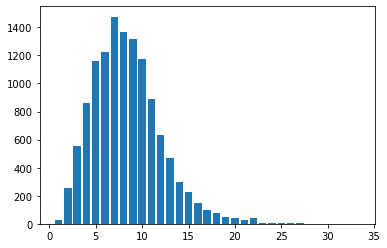

In [4]:
grouped_token_list = token_data["tokens"].values.tolist()
token_length_list = [len(token) for token in grouped_token_list]
token_count_data = pd.DataFrame(token_length_list, columns=["Length"])
token_count_data = token_count_data.groupby(["Length"]).size().reset_index(name="Count")
x = token_count_data["Length"].values.tolist()
y = token_count_data["Count"].values.tolist()
plot.bar(x, y)

<BarContainer object of 28 artists>

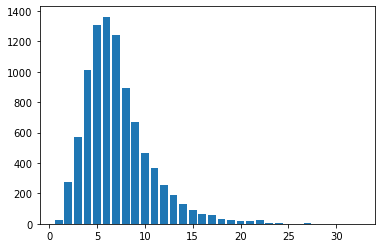

In [5]:
grouped_stemmed_token_list = stemmed_data["tokens"].values.tolist()
stemmed_length_list = [len(token) for token in grouped_stemmed_token_list]
stemmed_token_count_data = pd.DataFrame(stemmed_length_list, columns=["Length"])
stemmed_token_count_data = stemmed_token_count_data.groupby(["Length"]).size().reset_index(name="Count")
x = stemmed_token_count_data["Length"].values.tolist()
y = stemmed_token_count_data["Count"].values.tolist()
plot.bar(x, y)

#### Sentence Segmentation

<BarContainer object of 153 artists>

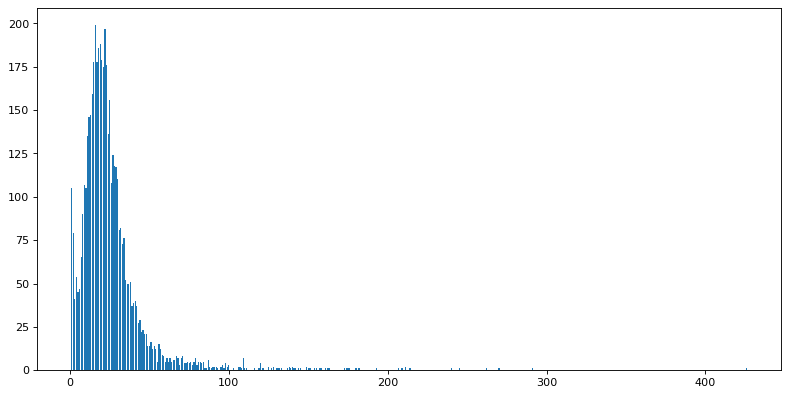

In [6]:
sentence_list = data_analysis.sentence_segment("Medical")
sentence_length_list = []

for sentence in sentence_list:
    word_list = sentence.split()
    count = 0

    if len(word_list) == 1 and not re.search('[a-zA-Z]', sentence):
        sentence_length_list.append(0)
        continue

    for word in word_list:
        if word.strip() != "":
            count += 1

    sentence_length_list.append(count)

sentence_length_data = pd.DataFrame(sentence_length_list, columns=["Length"])
sentence_length_data = sentence_length_data.groupby(["Length"]).size().reset_index(name="Count")
sentence_length_data = sentence_length_data[sentence_length_data["Length"] > 0]
x = sentence_length_data["Length"].values.tolist()
y = sentence_length_data["Count"].values.tolist()
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plot.bar(x, y)

#### POS Tagging

In [7]:
#nltk.download('averaged_perceptron_tagger')
selected_sentence_list = random.sample(sentence_list, 3)

for sentence in selected_sentence_list:
    print(sentence)
    tagged_list = nltk.pos_tag(data_analysis.get_tokens_from_sentence(sentence))

    for tag in tagged_list:
        print(tag)

    print("")

MRI, magnetic resonance imaging; PET/CT, positron emission tomography/computed tomography.
('MRI', 'NNP')
('magnetic', 'JJ')
('resonance', 'NN')
('imaging', 'VBG')
('PET/CT', 'NNP')
('positron', 'NN')
('emission', 'NN')
('tomography/computed', 'VBD')
('tomography', 'NN')

There are a number of important issues that need to be investigated.
('There', 'EX')
('are', 'VBP')
('a', 'DT')
('number', 'NN')
('of', 'IN')
('important', 'JJ')
('issues', 'NNS')
('that', 'WDT')
('need', 'VBP')
('to', 'TO')
('be', 'VB')
('investigated', 'VBN')

This approach suggests a new type of therapy focus on specific agerelated processes that underpin many diseases of late life might reduce the incidence or severity of dementia.
('This', 'DT')
('approach', 'NN')
('suggests', 'VBZ')
('a', 'DT')
('new', 'JJ')
('type', 'NN')
('of', 'IN')
('therapy', 'NN')
('focus', 'NN')
('on', 'IN')
('specific', 'JJ')
('agerelated', 'JJ')
('processes', 'NNS')
('that', 'WDT')
('underpin', 'VBP')
('many', 'JJ')
('diseases', 'NNS')
